# Notebook to evaluate the jargon proportion metric

We will compare the calculated jargon proportion and evaluate it against the average jargon proportions annotated by the group. 


Note: Correlation between average scores and calculated scores, rank-correlation vs normal correlation. 

In [1]:
import pandas as pd

In [2]:
annotated_lines = pd.read_csv('../../data/annotated_w_mean_jargon.csv')
calculated_lines = pd.read_csv('../../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels .csv')

In [3]:
# convert Title to title
annotated_lines['title'] = annotated_lines['Title']
annotated_lines = annotated_lines.drop(columns=['Title'])
annotated_lines.head()

,mean_jargon,title
0,0.087719,Solar panels that throw shade on canals are an...
1,0.160494,The vast majority of children and adolescents ...
2,0.213333,First crossover trial using resistance-trained...
3,0.148148,Study finds Earth's core is cooling faster tha...
4,0.305556,"Gene that enables memories, sense of direction..."


In [4]:
calculated_lines = calculated_lines[['id', 'title', 'jargon_proportion']]
calculated_lines.head()

,id,title,jargon_proportion
0,810xoi,The Bradford pear has created an ecological ni...,0.181818
1,810xx0,Astronomers say they've discovered evidence of...,0.068966
2,8114g8,The first detection of 21 cm signal from hydro...,0.083333
3,8116id,Universe's First Stars Detected? Get the Facts.,0.000000
4,8116m3,Simple telescope picks up hint of the Universe...,0.333333


In [5]:
combined = pd.merge(annotated_lines, calculated_lines, on='title')

In [6]:
# Correlation between average scores and calculated scores, rank-correlation vs normal correlation.
# mean_jargon is the average jargon proportion annotated by the group, while jargon_proportion is the calculated jargon proportion


In [7]:

from scipy.stats import spearmanr, pearsonr

spearman_corr = spearmanr(combined['mean_jargon'], combined['jargon_proportion'])
pearson_corr = pearsonr(combined['mean_jargon'], combined['jargon_proportion'])

print(f"Spearman correlation: {spearman_corr}")
print(f"Pearson correlation: {pearson_corr}")


Spearman correlation: SignificanceResult(statistic=0.10708850960390848, pvalue=0.4453294414958735)
Pearson correlation: PearsonRResult(statistic=-0.019035486976025275, pvalue=0.8923840597923983)


In [8]:
corr = combined['jargon_proportion'].corr(combined['mean_jargon'])

print(f"Correlation: {corr}")

Correlation: -0.01903548697602531


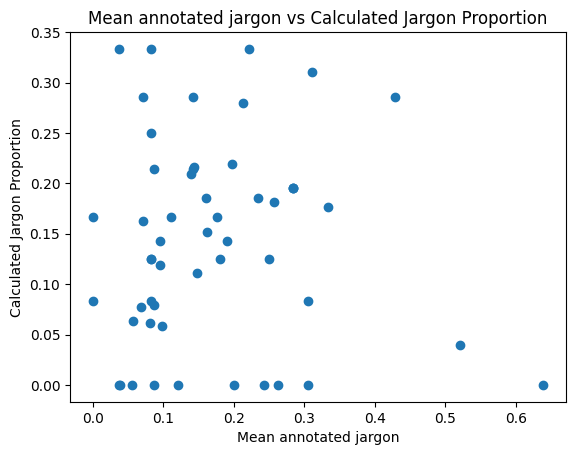

In [9]:
import matplotlib.pyplot as plt

plt.scatter(combined['mean_jargon'], combined['jargon_proportion'])
plt.xlabel('Mean annotated jargon')
plt.ylabel('Calculated Jargon Proportion')
plt.title('Mean annotated jargon vs Calculated Jargon Proportion')

plt.show()


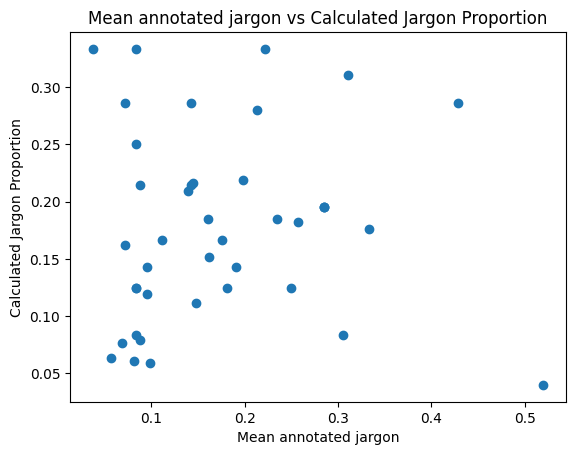

In [10]:
# ignore the 0 values and do the same
combined_filtered = combined[combined['mean_jargon'] != 0]
combined_filtered = combined_filtered[combined_filtered['jargon_proportion'] != 0]

spearman_corr_no_0 = spearmanr(combined_filtered['mean_jargon'], combined_filtered['jargon_proportion'])
pearson_corr_no_0 = pearsonr(combined_filtered['mean_jargon'], combined_filtered['jargon_proportion'])
corr_no_0 = combined_filtered['jargon_proportion'].corr(combined_filtered['mean_jargon'])

plt.scatter(combined_filtered['mean_jargon'], combined_filtered['jargon_proportion'])
plt.xlabel('Mean annotated jargon')
plt.ylabel('Calculated Jargon Proportion')
plt.title('Mean annotated jargon vs Calculated Jargon Proportion')

plt.show()


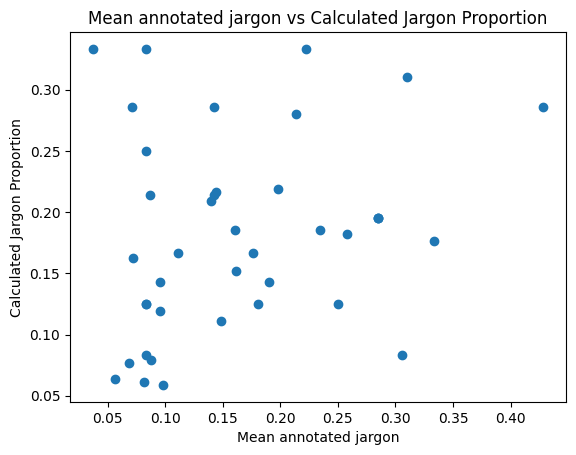

In [11]:
from scipy import stats
import numpy as np

# remove the outliers based on the standard deviation, based on: https://stackoverflow.com/a/23202269
combined_no_outliers = combined_filtered[np.abs(stats.zscore(combined_filtered['mean_jargon'])) < 3]
combined_no_outliers = combined_no_outliers[np.abs(stats.zscore(combined_no_outliers['jargon_proportion'])) < 3]


spearman_corr_no_outliers = spearmanr(combined_no_outliers['mean_jargon'], combined_no_outliers['jargon_proportion'])
pearson_corr_no_outliers = pearsonr(combined_no_outliers['mean_jargon'], combined_no_outliers['jargon_proportion'])
corr_no_outliers = combined_no_outliers['jargon_proportion'].corr(combined_no_outliers['mean_jargon'])

plt.scatter(combined_no_outliers['mean_jargon'], combined_no_outliers['jargon_proportion'])
plt.xlabel('Mean annotated jargon')
plt.ylabel('Calculated Jargon Proportion')
plt.title('Mean annotated jargon vs Calculated Jargon Proportion')

plt.show()

In [12]:
# kendall tau for each
from scipy.stats import kendalltau

kendall_corr = kendalltau(combined['mean_jargon'], combined['jargon_proportion'])
kendall_corr_no_0 = kendalltau(combined_filtered['mean_jargon'], combined_filtered['jargon_proportion'])
kendall_corr_no_outliers = kendalltau(combined_no_outliers['mean_jargon'], combined_no_outliers['jargon_proportion'])



In [13]:
print("\nCorrelations: ")
print(f"Spearman correlation: {spearman_corr}")
print(f"Pearson correlation: {pearson_corr}")
print(f"Correlation: {corr}")
print(f"Kendall tau: {kendall_corr}")
print("\nCorrelations without 0 values: ")
print(f"Spearman correlation: {spearman_corr_no_0}")
print(f"Pearson correlation: {pearson_corr_no_0}")
print(f"Correlation: {corr_no_0}")
print(f"Kendall tau: {kendall_corr_no_0}")
print("\nCorrelations without outliers: ")
print(f"Spearman correlation: {spearman_corr_no_outliers}")
print(f"Pearson correlation: {pearson_corr_no_outliers}")
print(f"Correlation: {corr_no_outliers}")
print(f"Kendall tau: {kendall_corr_no_outliers}")


Correlations: 
Spearman correlation: SignificanceResult(statistic=0.10708850960390848, pvalue=0.4453294414958735)
Pearson correlation: PearsonRResult(statistic=-0.019035486976025275, pvalue=0.8923840597923983)
Correlation: -0.01903548697602531
Kendall tau: SignificanceResult(statistic=0.08697179581478527, pvalue=0.37102213878789503)

Correlations without 0 values: 
Spearman correlation: SignificanceResult(statistic=0.1478150785011751, pvalue=0.35637817154109164)
Pearson correlation: PearsonRResult(statistic=0.05263337796129377, pvalue=0.7438022868391653)
Correlation: 0.05263337796129374
Kendall tau: SignificanceResult(statistic=0.1208728606727125, pvalue=0.2745181872022512)

Correlations without outliers: 
Spearman correlation: SignificanceResult(statistic=0.23632858445273083, pvalue=0.1420592455160639)
Pearson correlation: PearsonRResult(statistic=0.2332416327658079, pvalue=0.14749497225350627)
Correlation: 0.23324163276580787
Kendall tau: SignificanceResult(statistic=0.1796730968749

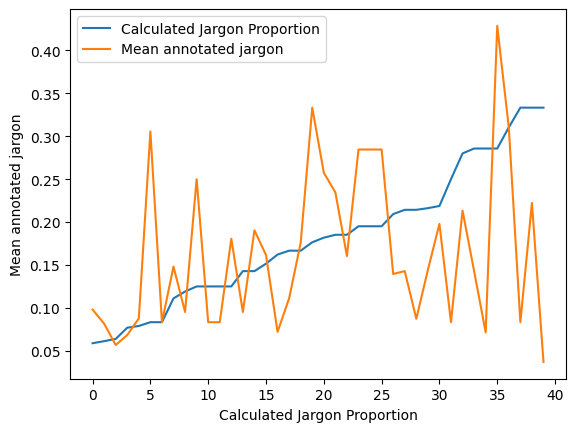

In [18]:
# sort by calculated jargon proportion and plot a lineplot
combined_no_outliers.sort_values(by='jargon_proportion', inplace=True)
combined_no_outliers.reset_index(drop=True, inplace=True)

plt.plot(combined_no_outliers['jargon_proportion'], label='Calculated Jargon Proportion')
plt.plot(combined_no_outliers['mean_jargon'], label='Mean annotated jargon')
plt.xlabel('Calculated Jargon Proportion')
plt.ylabel('Mean annotated jargon')
plt.legend(loc="upper left")
plt.show()